In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Credit Risk Prediction.csv')

In [3]:
df.head()

,Client_ID,Credit_Limit,Gender_Code,Education_Level,Marital_Status,Age_Years,Repay_Sep,Repay_Aug,Repay_Jul,Repay_Jun,...,BillAmt_Jun,BillAmt_May,BillAmt_Apr,PaidAmt_Sep,PaidAmt_Aug,PaidAmt_Jul,PaidAmt_Jun,PaidAmt_May,PaidAmt_Apr,Will_Default_Next_Month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.columns

Index(['Client_ID', 'Credit_Limit', 'Gender_Code', 'Education_Level',
       'Marital_Status', 'Age_Years', 'Repay_Sep', 'Repay_Aug', 'Repay_Jul',
       'Repay_Jun', 'Repay_May', 'Repay_Apr', 'BillAmt_Sep', 'BillAmt_Aug',
       'BillAmt_Jul', 'BillAmt_Jun', 'BillAmt_May', 'BillAmt_Apr',
       'PaidAmt_Sep', 'PaidAmt_Aug', 'PaidAmt_Jul', 'PaidAmt_Jun',
       'PaidAmt_May', 'PaidAmt_Apr', 'Will_Default_Next_Month'],
      dtype='object')

In [5]:
df.shape

(30000, 25)

In [6]:
df.isnull().sum()

,0
Client_ID,0
Credit_Limit,0
Gender_Code,0
Education_Level,0
Marital_Status,0
Age_Years,0
Repay_Sep,0
Repay_Aug,0
Repay_Jul,0
Repay_Jun,0


In [7]:
df['Credit_Limit'].value_counts()

,count
Credit_Limit,
50000,3365
20000,1976
30000,1610
80000,1567
200000,1528
...,...
800000,2
1000000,1
327680,1


In [8]:
for i in df.columns:
  print(df[i].value_counts())

Client_ID
29984    1
29983    1
29982    1
29981    1
29980    1
        ..
5        1
4        1
3        1
2        1
1        1
Name: count, Length: 30000, dtype: int64
Credit_Limit
50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
1000000       1
327680        1
760000        1
690000        1
Name: count, Length: 81, dtype: int64
Gender_Code
2    18112
1    11888
Name: count, dtype: int64
Education_Level
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
Marital_Status
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64
Age_Years
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     3

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Client_ID                30000 non-null  int64
 1   Credit_Limit             30000 non-null  int64
 2   Gender_Code              30000 non-null  int64
 3   Education_Level          30000 non-null  int64
 4   Marital_Status           30000 non-null  int64
 5   Age_Years                30000 non-null  int64
 6   Repay_Sep                30000 non-null  int64
 7   Repay_Aug                30000 non-null  int64
 8   Repay_Jul                30000 non-null  int64
 9   Repay_Jun                30000 non-null  int64
 10  Repay_May                30000 non-null  int64
 11  Repay_Apr                30000 non-null  int64
 12  BillAmt_Sep              30000 non-null  int64
 13  BillAmt_Aug              30000 non-null  int64
 14  BillAmt_Jul              30000 non-null  int64
 15  Bi

In [10]:
df.describe()

,Client_ID,Credit_Limit,Gender_Code,Education_Level,Marital_Status,Age_Years,Repay_Sep,Repay_Aug,Repay_Jul,Repay_Jun,...,BillAmt_Jun,BillAmt_May,BillAmt_Apr,PaidAmt_Sep,PaidAmt_Aug,PaidAmt_Jul,PaidAmt_Jun,PaidAmt_May,PaidAmt_Apr,Will_Default_Next_Month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
# for i in df.columns:
#   sns.histplot(data=df,x=i,kde=True)
#   plt.show()

In [12]:
# for i in df.columns:
#   sns.boxplot(data=df,x=i)
#   plt.show()


In [13]:
df.columns

Index(['Client_ID', 'Credit_Limit', 'Gender_Code', 'Education_Level',
       'Marital_Status', 'Age_Years', 'Repay_Sep', 'Repay_Aug', 'Repay_Jul',
       'Repay_Jun', 'Repay_May', 'Repay_Apr', 'BillAmt_Sep', 'BillAmt_Aug',
       'BillAmt_Jul', 'BillAmt_Jun', 'BillAmt_May', 'BillAmt_Apr',
       'PaidAmt_Sep', 'PaidAmt_Aug', 'PaidAmt_Jul', 'PaidAmt_Jun',
       'PaidAmt_May', 'PaidAmt_Apr', 'Will_Default_Next_Month'],
      dtype='object')

In [14]:
d=df.corr()
display(d)

,Client_ID,Credit_Limit,Gender_Code,Education_Level,Marital_Status,Age_Years,Repay_Sep,Repay_Aug,Repay_Jul,Repay_Jun,...,BillAmt_Jun,BillAmt_May,BillAmt_Apr,PaidAmt_Sep,PaidAmt_Aug,PaidAmt_Jul,PaidAmt_Jun,PaidAmt_May,PaidAmt_Apr,Will_Default_Next_Month
Client_ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
Credit_Limit,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
Gender_Code,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
Education_Level,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
Marital_Status,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
Age_Years,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
Repay_Sep,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
Repay_Aug,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
Repay_Jul,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
Repay_Jun,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


<Axes: >

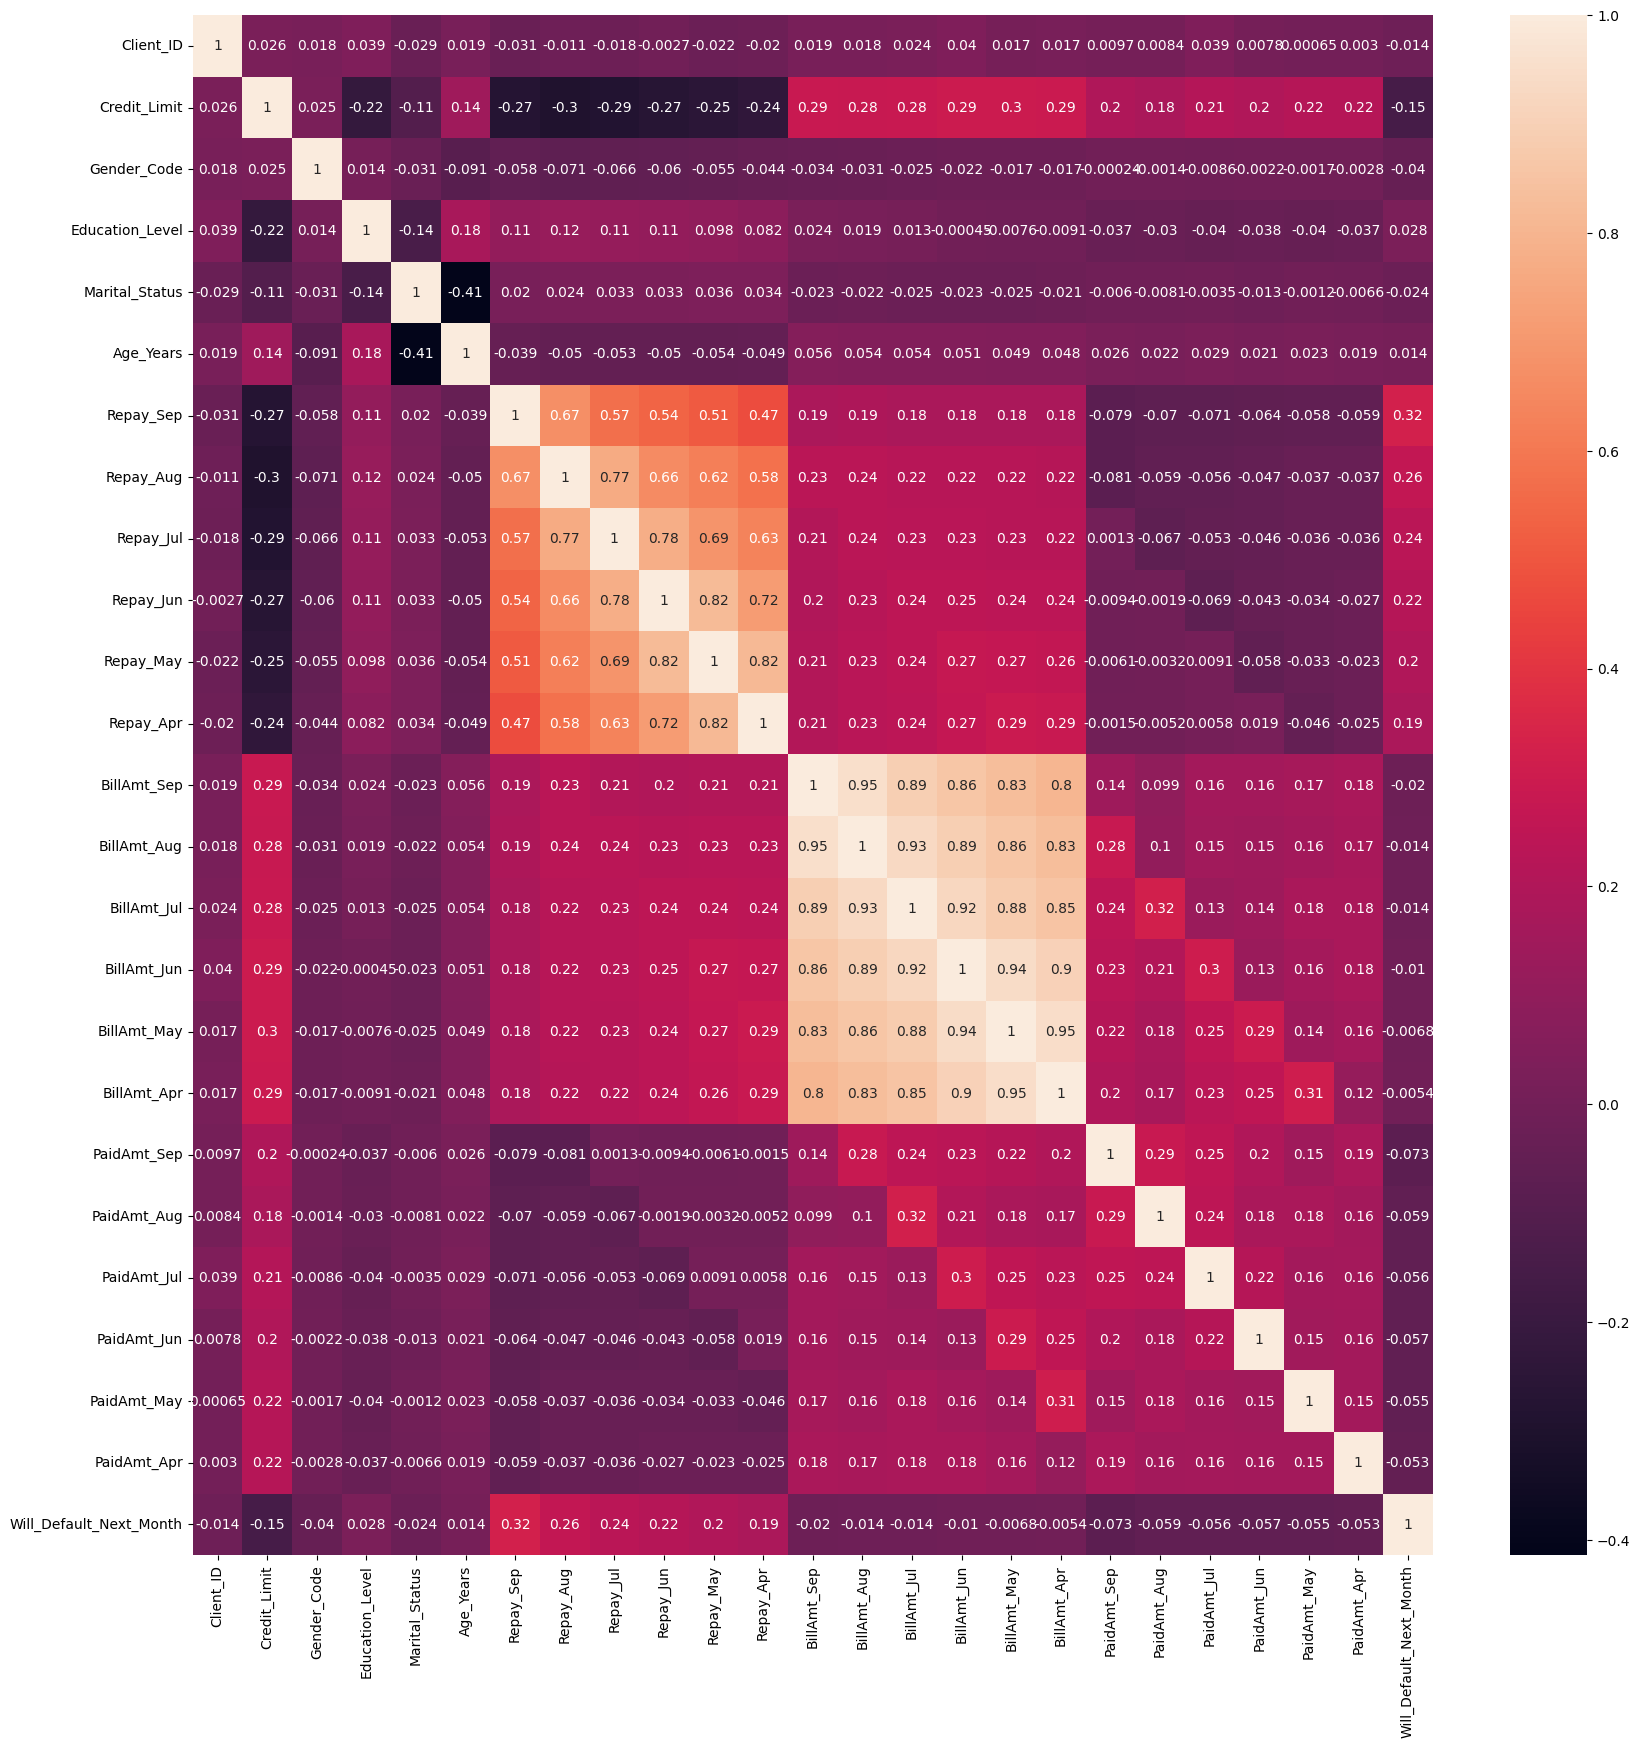

In [15]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(d,annot=True)

In [16]:
display(d[['Will_Default_Next_Month']].sort_values(by='Will_Default_Next_Month', ascending=False))

,Will_Default_Next_Month
Will_Default_Next_Month,1.000000
Repay_Sep,0.324794
Repay_Aug,0.263551
Repay_Jul,0.235253
Repay_Jun,0.216614
Repay_May,0.204149
Repay_Apr,0.186866
Education_Level,0.028006
Age_Years,0.013890
BillAmt_Apr,-0.005372


In [17]:
df.columns

Index(['Client_ID', 'Credit_Limit', 'Gender_Code', 'Education_Level',
       'Marital_Status', 'Age_Years', 'Repay_Sep', 'Repay_Aug', 'Repay_Jul',
       'Repay_Jun', 'Repay_May', 'Repay_Apr', 'BillAmt_Sep', 'BillAmt_Aug',
       'BillAmt_Jul', 'BillAmt_Jun', 'BillAmt_May', 'BillAmt_Apr',
       'PaidAmt_Sep', 'PaidAmt_Aug', 'PaidAmt_Jul', 'PaidAmt_Jun',
       'PaidAmt_May', 'PaidAmt_Apr', 'Will_Default_Next_Month'],
      dtype='object')

  df['Credit_Limit','age_years','Education_level','bilAmt_sep'all bit amouts]

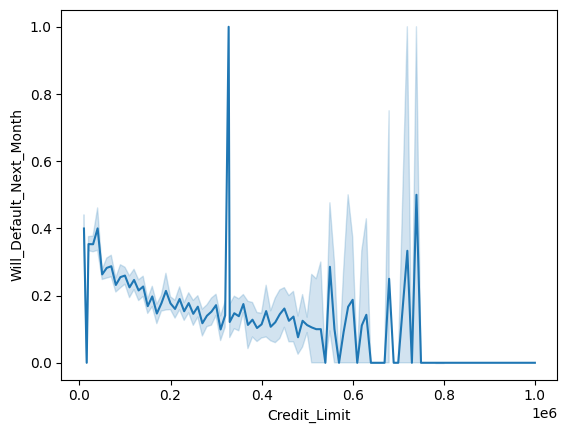

In [18]:
sns.lineplot(data=df,x='Credit_Limit',y='Will_Default_Next_Month')
plt.show()

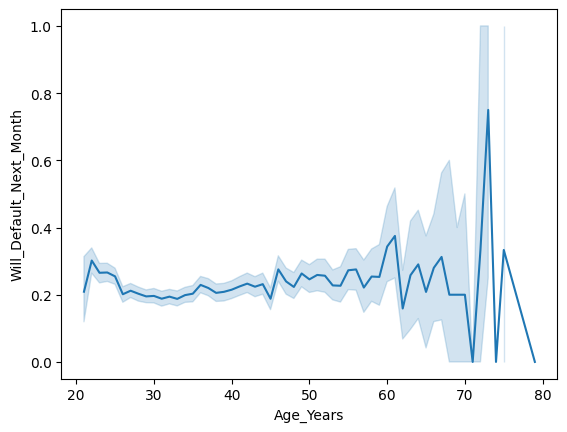

In [19]:
sns.lineplot(data=df,x='Age_Years',y='Will_Default_Next_Month')
plt.show()

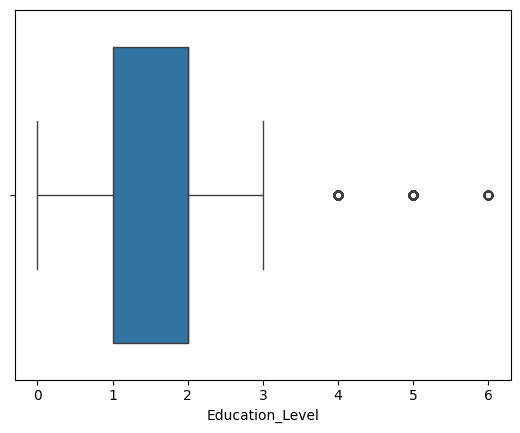

In [20]:
sns.boxplot(data=df,x='Education_Level')
plt.show()

only 3 dont remove

In [21]:
df.columns

Index(['Client_ID', 'Credit_Limit', 'Gender_Code', 'Education_Level',
       'Marital_Status', 'Age_Years', 'Repay_Sep', 'Repay_Aug', 'Repay_Jul',
       'Repay_Jun', 'Repay_May', 'Repay_Apr', 'BillAmt_Sep', 'BillAmt_Aug',
       'BillAmt_Jul', 'BillAmt_Jun', 'BillAmt_May', 'BillAmt_Apr',
       'PaidAmt_Sep', 'PaidAmt_Aug', 'PaidAmt_Jul', 'PaidAmt_Jun',
       'PaidAmt_May', 'PaidAmt_Apr', 'Will_Default_Next_Month'],
      dtype='object')

In [22]:
# for i in ['BillAmt_Sep', 'BillAmt_Aug',
#        'BillAmt_Jul', 'BillAmt_Jun', 'BillAmt_May', 'BillAmt_Apr','PaidAmt_Sep', 'PaidAmt_Aug', 'PaidAmt_Jul', 'PaidAmt_Jun',
#        'PaidAmt_May', 'PaidAmt_Apr']:
#        sns.lineplot(data=df,x=i,y='Will_Default_Next_Month')
#        sns.boxplot(data=df,x=i)
#        plt.show()

In [23]:
# for i in['BillAmt_Sep', 'BillAmt_Aug',
#        'BillAmt_Jul', 'BillAmt_Jun', 'BillAmt_May', 'BillAmt_Apr']:
#        sns.boxplot(data=df,x=i)
#        plt.show()

In [24]:
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-(1.5*iqr)
  uw=q3+(1.5*iqr)
  return lw,uw

In [25]:
for i in ['Credit_Limit']:
  lw,uw=wisker(df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
df.columns

Index(['Client_ID', 'Credit_Limit', 'Gender_Code', 'Education_Level',
       'Marital_Status', 'Age_Years', 'Repay_Sep', 'Repay_Aug', 'Repay_Jul',
       'Repay_Jun', 'Repay_May', 'Repay_Apr', 'BillAmt_Sep', 'BillAmt_Aug',
       'BillAmt_Jul', 'BillAmt_Jun', 'BillAmt_May', 'BillAmt_Apr',
       'PaidAmt_Sep', 'PaidAmt_Aug', 'PaidAmt_Jul', 'PaidAmt_Jun',
       'PaidAmt_May', 'PaidAmt_Apr', 'Will_Default_Next_Month'],
      dtype='object')

In [28]:
x = df[['Credit_Limit', 'Gender_Code', 'Education_Level',
       'Marital_Status', 'Age_Years', 'Repay_Sep', 'Repay_Aug', 'Repay_Jul',
       'Repay_Jun', 'Repay_May', 'Repay_Apr', 'BillAmt_Sep', 'BillAmt_Aug',
       'BillAmt_Jul', 'BillAmt_Jun', 'BillAmt_May', 'BillAmt_Apr',
       'PaidAmt_Sep', 'PaidAmt_Aug', 'PaidAmt_Jul', 'PaidAmt_Jun',
       'PaidAmt_May', 'PaidAmt_Apr']]
y = df['Will_Default_Next_Month']
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8076666666666666


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report for logisticRegression:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for logisticRegression:")
print(confusion_matrix(y_test, y_pred))

Classification Report for logisticRegression:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

Confusion Matrix for logisticRegression:
[[4528  145]
 [1009  318]]


Here are the Precision, Recall, and F1-score for the logisticRegression, along with its confusion matrix.

Accuracy=80.7

In [45]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
model.fit(x_train, y_train)
y_dc = model.predict(x_test)


Here are the Precision, Recall, and F1-score for the logisticRegression, along with its confusion matrix.

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report for DecisionTreeClassifier:")
print(classification_report(y_test, y_dc))

print("Confusion Matrix for DecisionTreeClassifier:")
print(confusion_matrix(y_test, y_dc))

from sklearn.metrics import accuracy_score
print("Accuracy score for DecisionTreeClassifier:")
print(accuracy_score(y_test, y_dc))

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      4673
           1       0.37      0.41      0.39      1327

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.72      0.72      6000

Confusion Matrix for DecisionTreeClassifier:
[[3757  916]
 [ 787  540]]
Accuracy score for DecisionTreeClassifier:
0.7161666666666666


In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
y_rf = model.predict(x_test)


Here are the Precision, Recall, and F1-score for the RandomForestClassifier, along with its confusion matrix.

In [50]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print("Classification Report for RandomForestClassifier:")
print(classification_report(y_test, y_rf))

print("Confusion Matrix for RandomForestClassifier:")
print(confusion_matrix(y_test, y_rf))

print("Accuracy score for RandomForestClassifier:")
print(accuracy_score(y_test, y_rf))

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Confusion Matrix for RandomForestClassifier:
[[4403  270]
 [ 839  488]]
Accuracy score for RandomForestClassifier:
0.8151666666666667


In [51]:
from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(x_train, y_train)
y_svm = model.predict(x_test)
from sklearn.metrics import accuracy_score
svm_accuracy_score = accuracy_score(y_test, y_pred)
print(svm_accuracy_score)

0.7161666666666666


Here are the Precision, Recall, and F1-score for the svm, along with its confusion matrix.

In [53]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print("Classification Report for SVM classifier:")
print(classification_report(y_test, y_svm))

print("Confusion Matrix for SVM classifier:")
print(confusion_matrix(y_test, y_svm))

print("Accuracy score for SVM classifier:")
print(accuracy_score(y_test, y_svm))

Classification Report for SVM classifier:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.34      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000

Confusion Matrix for SVM classifier:
[[4448  225]
 [ 878  449]]
Accuracy score for SVM classifier:
0.8161666666666667


In [54]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_knn = model.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7161666666666666


Here are the Precision, Recall, and F1-score for the knn clasifier, along with its confusion matrix.

In [55]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print("Classification Report for KNeighborsClassifier:")
print(classification_report(y_test, y_knn))

print("Confusion Matrix for KNeighborsClassifier:")
print(confusion_matrix(y_test, y_knn))

print("Accuracy score for KNeighborsClassifier:")
print(accuracy_score(y_test, y_knn))

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4673
           1       0.55      0.35      0.43      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.64      0.65      6000
weighted avg       0.77      0.79      0.78      6000

Confusion Matrix for KNeighborsClassifier:
[[4285  388]
 [ 856  471]]
Accuracy score for KNeighborsClassifier:
0.7926666666666666


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(x_train, y_train)
y_pred_gb = model_gb.predict(x_test)
print(accuracy_score(y_test, y_pred_gb))

0.8183333333333334


Here are the Precision, Recall, and F1-score for the GradientBoostingClassifier, along with its confusion matrix.

In [56]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print("Classification Report for GradientBoostingClassifier:")
print(classification_report(y_test, y_pred_gb))

print("Confusion Matrix for GradientBoostingClassifier:")
print(confusion_matrix(y_test, y_pred_gb))

print("Accuracy score for GradientBoostingClassifier:")
print(accuracy_score(y_test, y_pred_gb))

Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Confusion Matrix for GradientBoostingClassifier:
[[4432  241]
 [ 849  478]]
Accuracy score for GradientBoostingClassifier:
0.8183333333333334


In [36]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)
print(accuracy_score(y_test, y_pred_xgb))

0.81


Here are the Precision, Recall, and F1-score for the XGBClassifier, along with its confusion matrix.

In [57]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print("Classification Report for XGBClassifier:")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix for XGBClassifier:")
print(confusion_matrix(y_test, y_pred_xgb))

print("Accuracy score for XGBClassifier:")
print(accuracy_score(y_test, y_pred_xgb))

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      4673
           1       0.62      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

Confusion Matrix for XGBClassifier:
[[4377  296]
 [ 844  483]]
Accuracy score for XGBClassifier:
0.81
